In [1]:
import dipy_multiview as dm
import io_utils
import numpy as np

INFO: successfully registered image array for dask distributed serialization


In [171]:
views = range(4)
transfs = [io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_transf_view_000_000_v%03d_c00.imagear.mhd' %iview) for iview in views]
stack_properties = io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_stack_props_000_000.dict.h5')
fusion_params  = io_utils.process_input_element('/Users/marvin/data/dbspim/20140911_cxcr7_wt/mv_params0_000_000.prealignment.h5')
filepath = '/Users/marvin/data/dbspim/20140911_cxcr7_wt/wt_01.czi'
orig_stack_propss = []
for iview in views:
    orig_stack_props = dm.get_stack_properties_from_view_dict({'filename':filepath,'view':iview},[8,8,2])
    orig_stack_propss.append(orig_stack_props)
    print(orig_stack_props)

/Users/marvin/miniconda3/envs/chemoatlas/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([-697.582     , 3792.74710756,   38.04709926]), 'size': array([ 90, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([-383.788     , 3792.38310756, -657.40890074]), 'size': array([102, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([ 366.513     , 3792.55110756, -293.44090074]), 'size': array([ 86, 240, 175])}
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
{'spacing': array([6.        , 5.16150744, 5.16150744]), 'origin': array([  72.667     , 3792.67910756,  393.33409926]), 'size': array([ 92, 240, 175])}


In [3]:
import importlib
importlib.reload(dm)
w = dm.get_weights_dct(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                transfs,
                fusion_params_label,
                orig_stack_propss,
                stack_properties_label)

DECORATOR local... get_weights_dct
dct: choosing size 10
dct: choosing max_kernel 5
dct: choosing gaussian_kernel 5
calculating dct weights...
filtering
filtering
filtering
filtering
filtering
filtering
filtering
filtering
DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


In [183]:
import importlib
importlib.reload(dm)
w6 = dm.get_weights_dct(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                transfs,
                fusion_params_label,
                orig_stack_propss,
                stack_properties_label,
#                 max_kernel = 0,
#                 gaussian_kernel = 0,
#                 how_many_best_views = 2,
#                 cumulative_weight_best_views = 0.9,
                
)

DECORATOR local... get_weights_dct
dct: choosing size 10
dct: choosing max_kernel 5
dct: choosing gaussian_kernel 5
calculating dct weights...
filtering
filtering
filtering
filtering
filtering
filtering
filtering
filtering
DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


In [189]:
import importlib
importlib.reload(dm)
w6 = dm.get_weights_simple(
                # [multiview_view_corr_label % (ds, sample, view, ch) for view in all_views],
                orig_stack_propss,
                fusion_params,
                stack_properties_label,
                
)

DECORATOR local... get_weights_simple
10
10
10
10
10
10
10
10
10
10
10
10


<IPython.core.display.Javascript object>


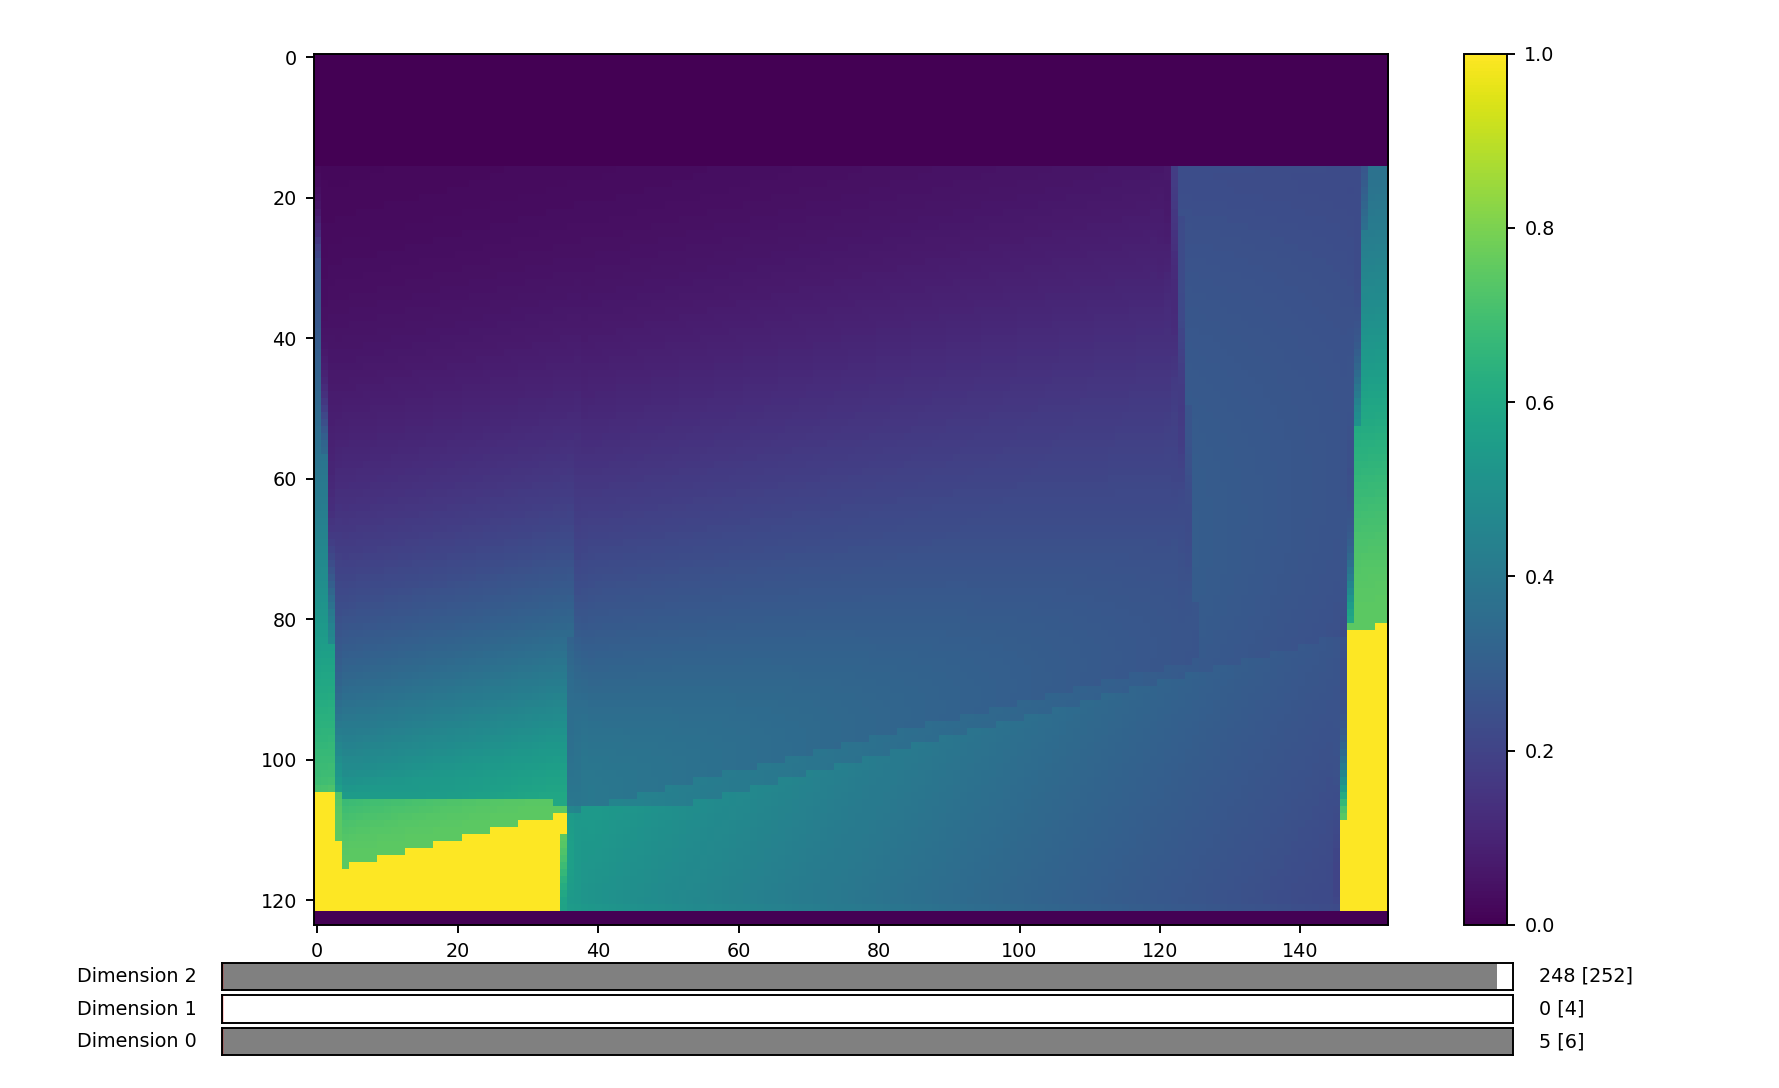

(<Figure size 988.8x604.8 with 5 Axes>,
 <matplotlib.image.AxesImage at 0x152cf2ef60>)

In [190]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array([w,w2,w3,w4,w5,w6]).swapaxes(-3,-2),vmin=0,vmax=1)

<IPython.core.display.Javascript object>


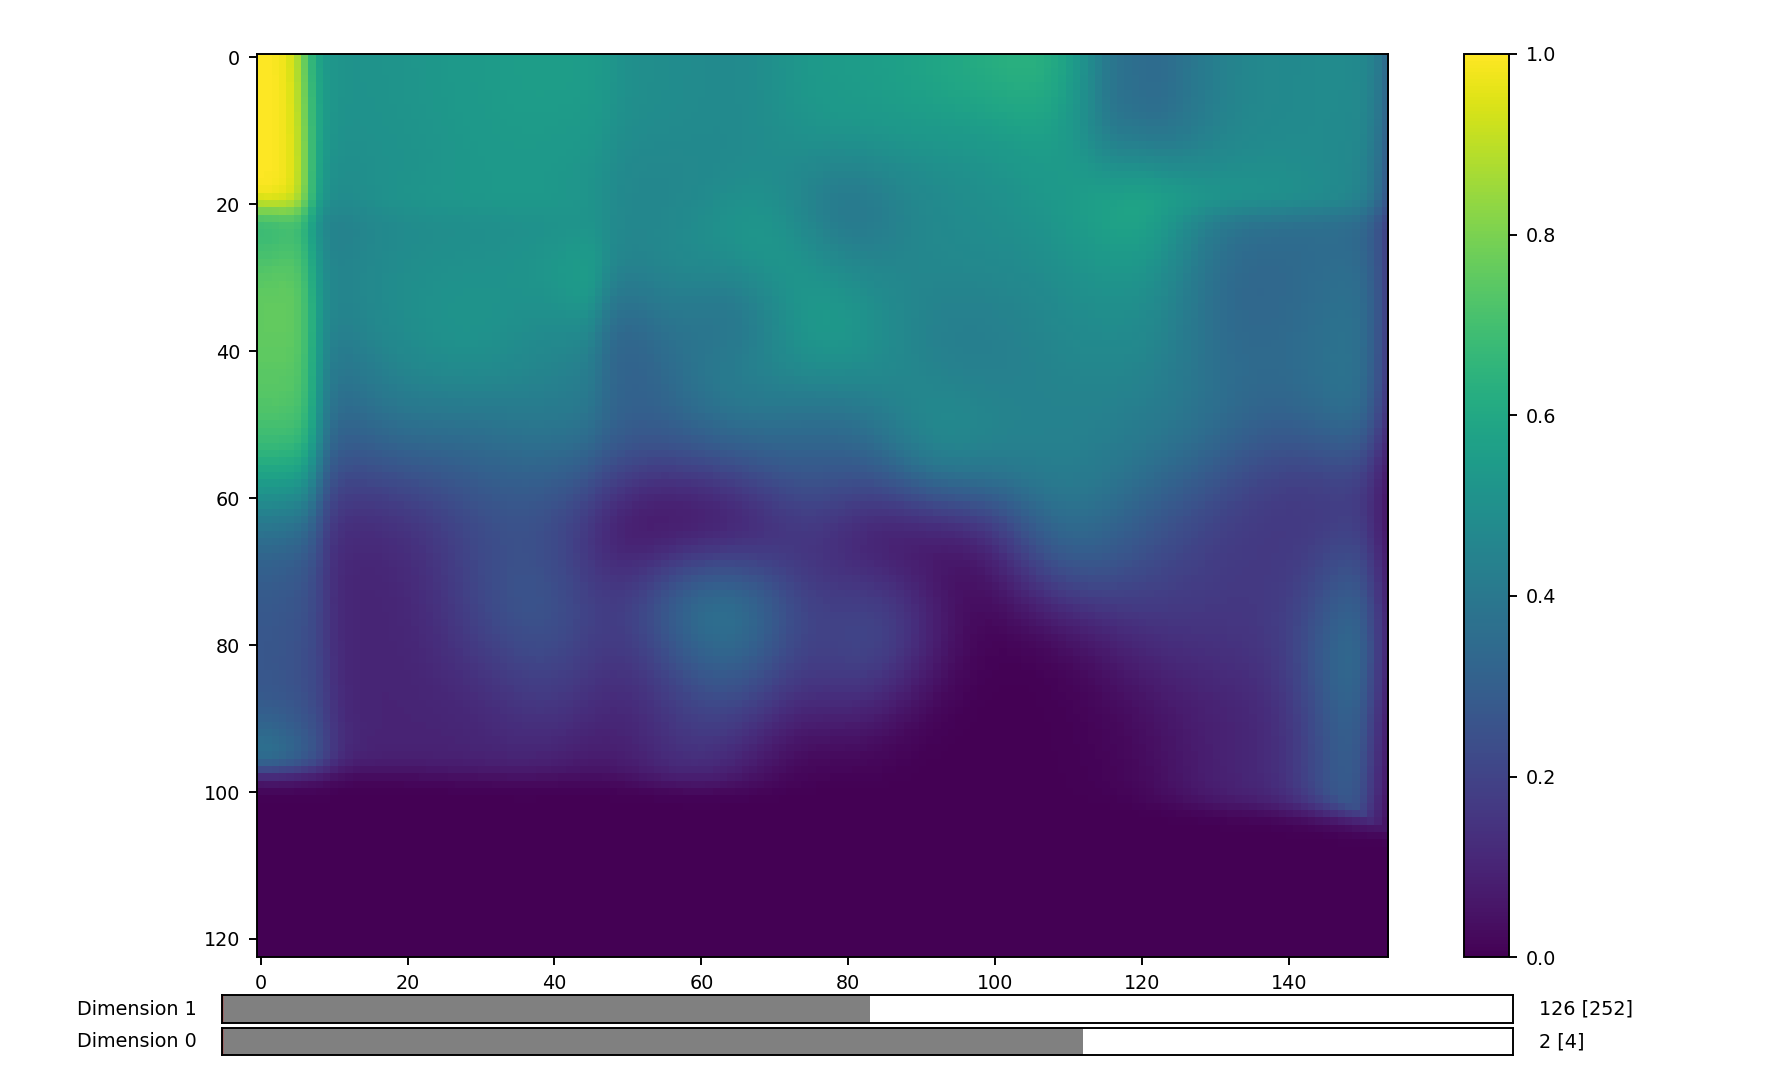

(<Figure size 988.8x604.8 with 4 Axes>,
 <matplotlib.image.AxesImage at 0x152ddb9be0>)

In [84]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array(w).swapaxes(-3,-2),vmin=0,vmax=1)

In [16]:
w = np.array(w)
w.shape

(4, 123, 252, 154)

In [26]:
np.cumsum(tmp)

In [38]:
# ws = np.sort(w,axis=0)
# wss = []
# for exp in np.linspace(1,5,5):
#     tmpw = ws**exp
#     tmpsum = np.sum(tmpw,0)
#     tmpsum[tmpsum==0] = 1
#     tmpw = tmpw/tmpsum
#     nsum = np.sum(tmpw[-2:],(-3,-2,-1))/np.product(ws.shape[-3:])
    
#     tmpw = w**exp
#     tmpsum = np.sum(tmpw,0)
#     tmpsum[tmpsum==0] = 1
#     tmpw = tmpw/tmpsum
#     wss.append(tmpw)
    
#     print(exp,nsum,np.sum(nsum))

1.0 [0.33647287 0.48525062] 0.8217234944874043
2.0 [0.30810349 0.57685732] 0.8849608096143959
3.0 [0.27635926 0.63988169] 0.9162409475342864
4.0 [0.24884074 0.68522342] 0.9340641597172048
5.0 [0.22607148 0.71919132] 0.9452627985459128


In [54]:
wf = w[:,np.max(w,0)>2*(1/len(w))]
ws = np.sort(wf,axis=0)
wss = []
for exp in np.linspace(1,5,5):
    tmpw = ws**exp
    tmpsum = np.sum(tmpw,0)
    tmpsum[tmpsum==0] = 1
    tmpw = tmpw/tmpsum
    nsum = np.sum(tmpw[-2:],(-1))/ws.shape[-1]
    
    tmpw = w**exp
    tmpsum = np.sum(tmpw,0)
    tmpsum[tmpsum==0] = 1
    tmpw = tmpw/tmpsum
    wss.append(tmpw)
    
    print(exp,nsum,np.sum(nsum))

1.0 [0.32991077 0.58973753] 0.9196483080614938
2.0 [0.26823343 0.70301508] 0.9712485073577211
3.0 [0.21779762 0.77139544] 0.9891930570769606
4.0 [0.18193697 0.81390616] 0.9958431287213834
5.0 [0.15659452 0.84177508] 0.9983696068238752


In [73]:
wf = w[:,np.max(w,0)>(2*(1/len(w)))]
# wf = wf[:,np.sum(wf,0)>0]
wfs = np.sort(wf,axis=0)

def energy(exp):
    exp = exp[0]
    tmpw = wfs**exp
    tmpsum = np.sum(tmpw,0)
    tmpw = tmpw/tmpsum
    nsum = np.sum(tmpw[-2:],(-1))/wfs.shape[-1]
    energy = np.abs(np.sum(nsum) - 0.9)
    return energy

from scipy import optimize
res = optimize.minimize(energy,[0.5],bounds = [[0.5,5]],method='L-BFGS-B',options={'maxiter':10})


# scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]¶

# for exp in np.linspace(0.5,1.5,5): print(exp,energy(exp))

In [78]:
res.x[0]

0.8012480091292239

<IPython.core.display.Javascript object>


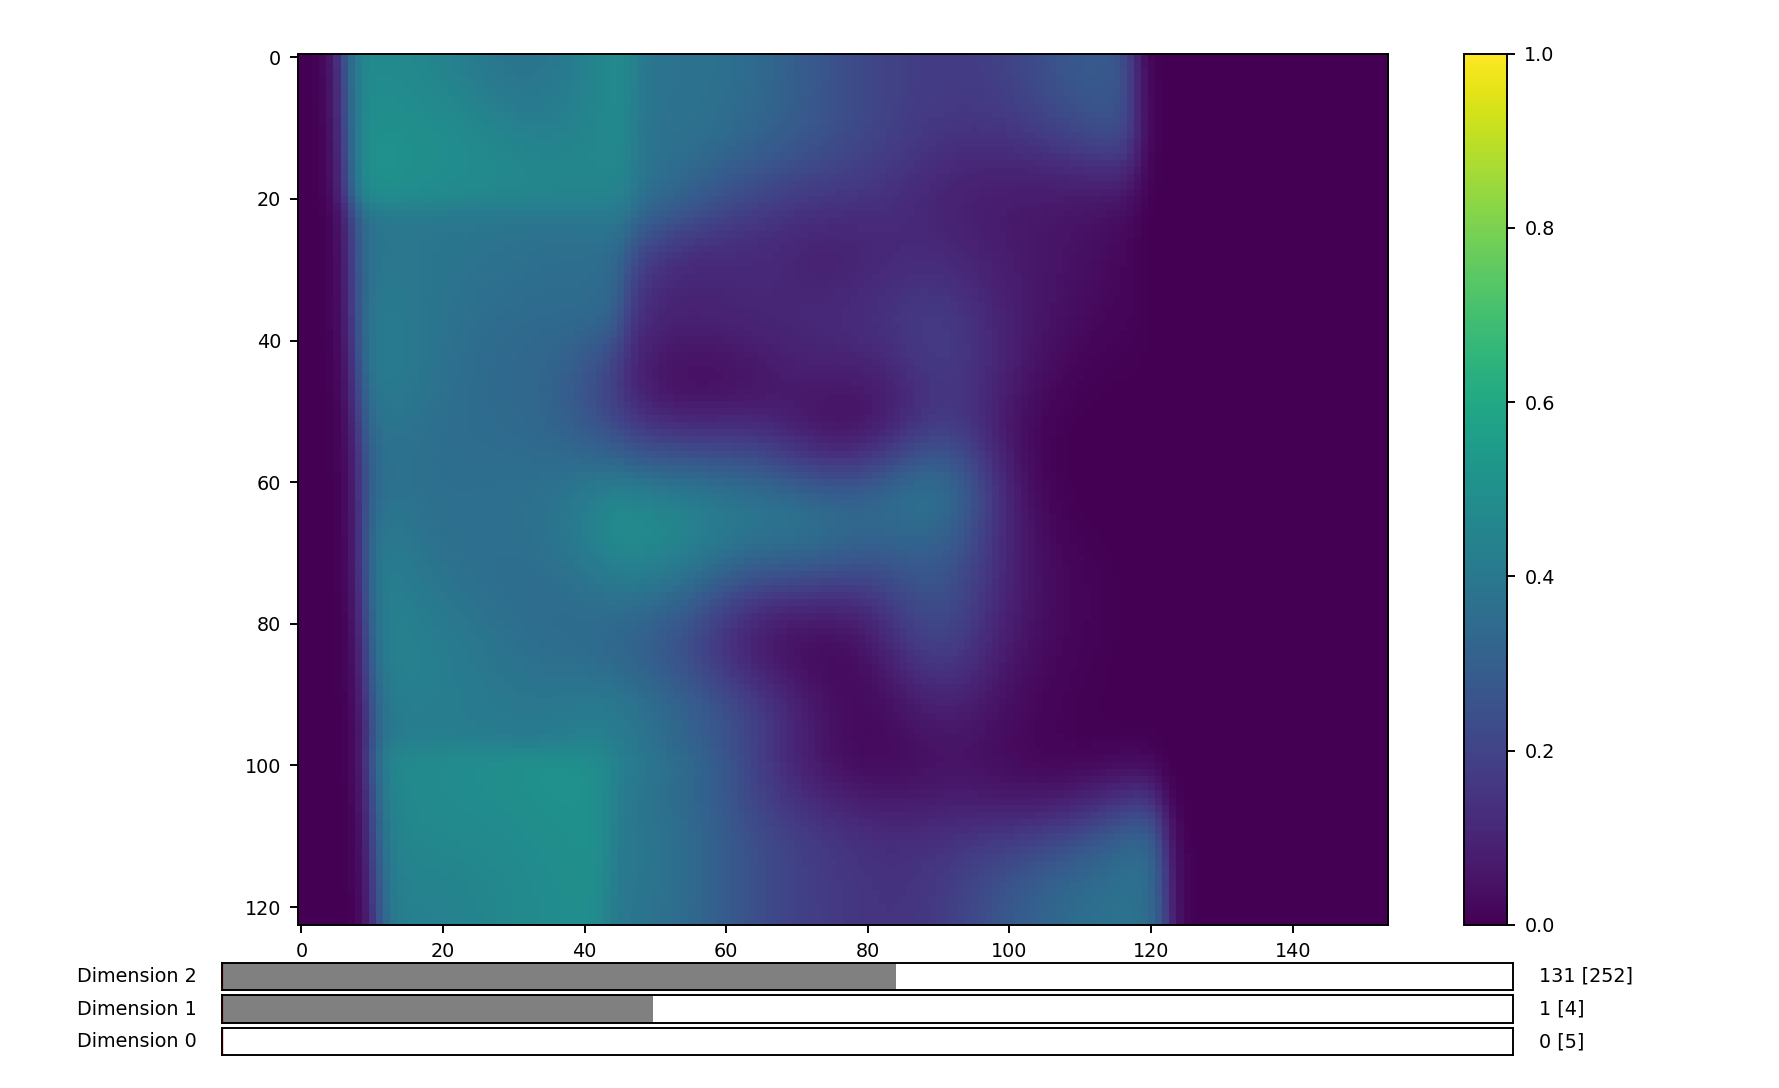

(<Figure size 988.8x604.8 with 5 Axes>,
 <matplotlib.image.AxesImage at 0x152a08e048>)

In [75]:
import tifffile
%matplotlib notebook
tifffile.imshow(np.array(wss).swapaxes(-3,-2),vmin=0,vmax=1)

In [66]:
t.shape

(86, 240, 175)

In [68]:
v = dm.readStackFromMultiviewMultiChannelCzi(filepath,2,raw_input_binning=[8,8,2],do_clean_pixels=False,do_smooth=False)

DECORATOR local... readStackFromMultiviewMultiChannelCzi
reading /Users/marvin/data/dbspim/20140911_cxcr7_wt/wt_01.czi view 2 ch 0 ill None
getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)
old shape: 172 1920 1400
DECORATOR local... bin_stack
new shape: 86 240 175


In [101]:
import czifile
self = czifile.CziFile(filepath)
view = 2
ch = 0
resize = True
order = 0

nonZeroDims = []
for idim in range(len(self.shape)):
    if self.shape[idim]>1: nonZeroDims.append(idim)

image = []

ndims = len(self.start)
for directory_entry in self.filtered_subblock_directory:

    for dim in directory_entry.dimension_entries:
        if dim.dimension == 'V':
            if view is not None and not dim.start == view: continue
            
    
    
#     index_start = [directory_entry.start[i] - self.start[i] for i in range(ndims)]
#     if index_start[0] != view or index_start[5] != ch: continue

    # print(index_start[0],directory_entry.start)
    subblock = directory_entry.data_segment()
    tile = subblock.data(resize=resize, order=order)
    # index = [slice(i-j, i-j+k) for i, j, k in
    #          zip(directory_entry.start, self.start, tile.shape)]

    try:
        image.append(tile)
    except ValueError as e:
        warnings.warn(str(e))

image =  np.array(image)

In [102]:
image.shape

(1482, 1, 1, 1, 1, 1, 1, 1, 1, 1920, 1400, 1)

In [141]:
view = 2
ch = 0
ill = 0
i = 0
for directory_entry in self.filtered_subblock_directory:
    plane_is_wanted = True
    for dim in directory_entry.dimension_entries:
        
        if dim.dimension == 'V':
            if view is not None and not dim.start == view:
                plane_is_wanted = False
                break
                
        if dim.dimension == 'C':
            if ch is not None and not dim.start == ch:
                plane_is_wanted = False
                break
                    
        if dim.dimension == 'I':
            if ill is not None and not dim.start == ill:
                plane_is_wanted = False
                break

    if not plane_is_wanted: continue
    i += 1
i

172

In [168]:
def count_planes_of_view_in_czifile(self,view):
    
    """
    get number of zplanes of a given view independently of number of channels and illuminations
    """

    curr_ch = 0
    curr_ill = 0
    i = 0
    for directory_entry in self.filtered_subblock_directory:
        plane_is_wanted = True
        ch_or_ill_changed = False
        for dim in directory_entry.dimension_entries:

            if dim.dimension == 'V':
                if view is not None and not dim.start == view:
                    plane_is_wanted = False
                    break

            if dim.dimension == 'C':
                if curr_ch != dim.start:
                    ch_or_ill_changed = True
                    break

            if dim.dimension == 'I':
                if curr_ill != dim.start:
                    ch_or_ill_changed = True
                    break

        if plane_is_wanted and not ch_or_ill_changed: i += 1

    return i
cf = czifile.CziFile(filepath)
count_planes_of_view_in_czifile(cf,2)

172

In [169]:
dm = importlib.reload(dm)
cf = czifile.CziFile(filepath)
im = cf.asarray_random_access(view=0,ch=0,ill=0)

In [157]:
im.shape

(180, 1920, 1400)

In [98]:
dim.start

0

In [91]:
image.shape

(172, 1, 1, 1, 1, 1, 1, 1, 1, 1920, 1400, 1)

In [170]:
info = dm.getStackInfoFromCZI(filepath)
info

getting stack info
(4, 1, 1, 1, 1, 2, 1, 204, 1920, 1400, 1)


{'origins': array([[  38.04709926, 3792.74710756, -697.582     ],
        [-657.40890074, 3792.38310756, -383.788     ],
        [-293.44090074, 3792.55110756,  366.513     ],
        [ 393.33409926, 3792.67910756,   72.667     ]]),
 'positions': array([[ 4.89679000e+02,  4.41212800e+03, -6.97582000e+02,
          3.70009831e-01],
        [-2.05777000e+02,  4.41176400e+03, -3.83788000e+02,
          1.94008876e+00],
        [ 1.58191000e+02,  4.41193200e+03,  3.66513000e+02,
          3.51160274e+00],
        [ 8.44966000e+02,  4.41206000e+03,  7.26670000e+01,
          5.08239919e+00]]),
 'centerOfRotation': array([  255.78643, -4755.94   ,   -63.86745]),
 'axisOfRotation': 1,
 'sizes': array([[1400, 1920,  180],
        [1400, 1920,  204],
        [1400, 1920,  172],
        [1400, 1920,  185]]),
 'spacing': array([0.64518843, 0.64518843, 3.        ]),
 'originalShape': array([   4,    1,    1,    1,    1,    2,    1,  204, 1920, 1400,    1])}

In [79]:
from image_array import ImageArray
orig_stack_props = orig_stack_propss[1]

tmporigin = orig_stack_props['origin'] + orig_stack_props['spacing'] / 2.
badplanes = int(0 / orig_stack_props['spacing'][0])  # in microns
tmporigin[0] += orig_stack_props['spacing'][0] * badplanes
# print('WATCH OUT! simple_weights: disregarding %s bad planes at the end of the stack' % badplanes)

# reducedview = view[badplanes:-1, :-1, :-1]
# reducedview_shape = np.array(orig_stack_props['size'])-1
reducedview_shape = np.array(orig_stack_props['size'])
reducedview_shape[0] -= badplanes
reducedview = np.ones(reducedview_shape,dtype=np.uint16)
reducedview = ImageArray(reducedview + 1, spacing=orig_stack_props['spacing'], origin=tmporigin)

In [80]:
reducedview.shape,v.shape

((102, 240, 175), (86, 240, 175))

In [74]:
tifffile.imshow(np.array([reducedview,v]).swapaxes(-3,-2)/100.,vmin=0,vmax=1)

AxisError: axis1: axis -3 is out of bounds for array of dimension 1

<IPython.core.display.Javascript object>


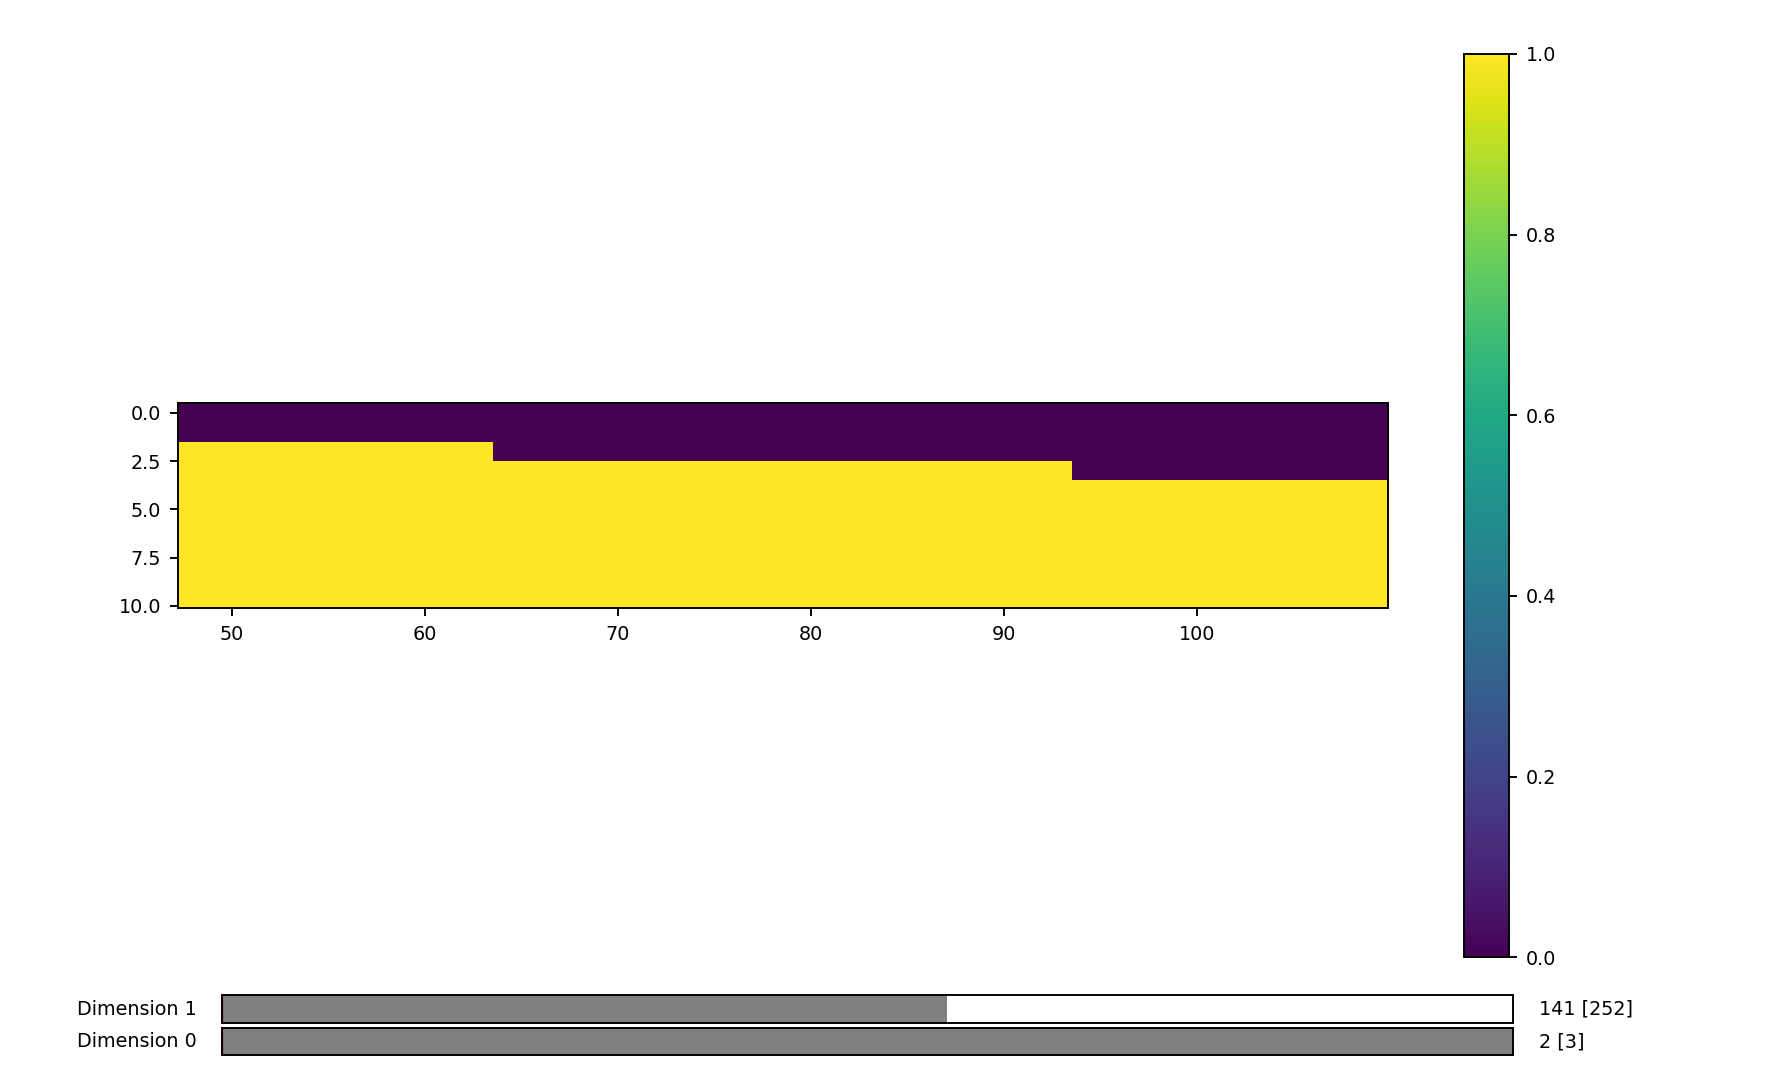

(<Figure size 988.8x604.8 with 4 Axes>,
 <matplotlib.image.AxesImage at 0x152c030c50>)

In [173]:
dm = importlib.reload(dm)
t = dm.transform_stack_sitk(v,fusion_params[2],stack_properties=stack_properties)
mask = dm.get_mask_in_target_space(orig_stack_propss[2],
                               stack_properties,
                               fusion_params[2],
                               )
tifffile.imshow(np.array([transfs[2]/100.,t/100.,mask]).swapaxes(-3,-2),vmin=0,vmax=1)

In [36]:
2*3*4*5

120

In [87]:
da.map_blocks?

In [18]:
import dask.array as da
import numpy as np
import dipy_multiview as dm
from dipy_multiview import transform_stack_sitk
from image_array import ImageArray

def scale_down_dask_array(a,b=3):
    
    for dim in range(1,4):
        relevant_size = a.chunks[dim][0]
        if relevant_size%b: raise(Exception('scaling down only implemented for binning factors fitting into the chunk size'))

    def dask_scale_down_chunk(x,b=4):
        res = []
        for i in range(len(x)):
            out_shape = (np.array(x.shape[1:])/b).astype(np.int64)
            tmp = transform_stack_sitk(ImageArray(x[i]),None,out_spacing=[b,b,b],out_shape=out_shape,out_origin=[0.,0,0])
            res.append(tmp)
        return np.array(res)
    
    res = da.map_blocks(dask_scale_down_chunk,a,dtype=np.float32,chunks=tuple([a.chunksize[0]]+[a.chunksize[dim]/b for dim in range(1,4)]),**{'b':b})
    
    return res

def scale_up_dask_array(a,b=3):
    
    if not np.isclose(b,int(b)):
        raise(Exception('scaling up of dask arrays only implemented for integer scalings'))
    else:
        b = int(b)
    
    def dask_scale_up_chunk(x,b=4):
        res = []
        for i in range(len(x)):
            out_shape = (np.array(x.shape[1:])*b).astype(np.int64)
            tmp = transform_stack_sitk(ImageArray(x[i]),None,out_spacing=[1./b]*3,out_shape=out_shape,out_origin=[0.,0,0])
            res.append(tmp)
        return np.array(res)
    
    res = da.map_blocks(dask_scale_up_chunk,a,dtype=np.float32,chunks=tuple([a.chunksize[0]]+[a.chunksize[dim]*b for dim in range(1,4)]),**{'b':b})
    
    return res

o1 = da.ones((3,100,100,100),chunks=(3,10,10,10))

res = scale_down_dask_array(o1,b=2)
ress = res.compute()
res2 = scale_up_dask_array(o1,b=1)#.compute()
ress2 = res2.compute()


print(o1.shape,o1.chunks)
print(res.shape,res.chunksize,ress.shape)
print(res2.shape,res2.chunksize,ress2.shape)

# print(o1.shape,o1.chunks)
# print(res2.shape,res2.chunks)

(3, 100, 100, 100) ((3,), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10))
(3, 50, 50, 50) (3, 5, 5, 5) (3, 50, 50, 50)
(3, 100, 100, 100) (3, 10, 10, 10) (3, 100, 100, 100)


In [13]:
print(res.shape,res.chunksize,ress.shape)


(3, 50, 50, 50) (3, 5, 5, 5) (1, 50, 50, 50)


In [74]:
res = da.map_blocks(dask_scale_down_chunk,o1,dtype=np.float32,chunks=(5,5,5))
ress = res.compute()

print(o1.shape,o1.chunks)
print(res.shape,res.chunks)

(100, 100, 1000) ((10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10))
(50, 50, 500) ((5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5))


In [35]:
import dask.array as da
import numpy as np
import dipy_multiview as dm
# o1 = da.ones((100,100,100),chunks=(10,9,8))
# o1 = da.ones((100,),chunks=(9))
o1 = da.ones((100,),chunks=(9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1,))


o1.chunks

def scale(x,b=2):
    res = x[:(len(x)//b)]
    return res
    
res = da.map_blocks(scale,o1,dtype=np.float32,chunks=(9//2,))
ress = res.compute()

In [30]:
print(o1.shape,o1.chunks)
print(res.shape,res.chunks)

# ,print(ress.shape)

(100,) ((9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1),)
(48,) ((4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4),)


In [24]:
ress,o1.compute()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [63]:
# def rebin(arr, new_shape):
#     shape = (new_shape[0], arr.shape[0] // new_shape[0],
#              new_shape[1], arr.shape[1] // new_shape[1])
#     return arr.reshape(shape).mean(-1).mean(1)

def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1],
             new_shape[2], arr.shape[2] // new_shape[2])
    print(shape)
    return arr.reshape(shape).mean(-1).mean(-2).mean(-3)

im = np.random.randint(0,100,(10,10,10))
im2 = rebin(im,(5,5,5))
im2.shape

(5, 2, 5, 2, 5, 2)


(5, 5, 5)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


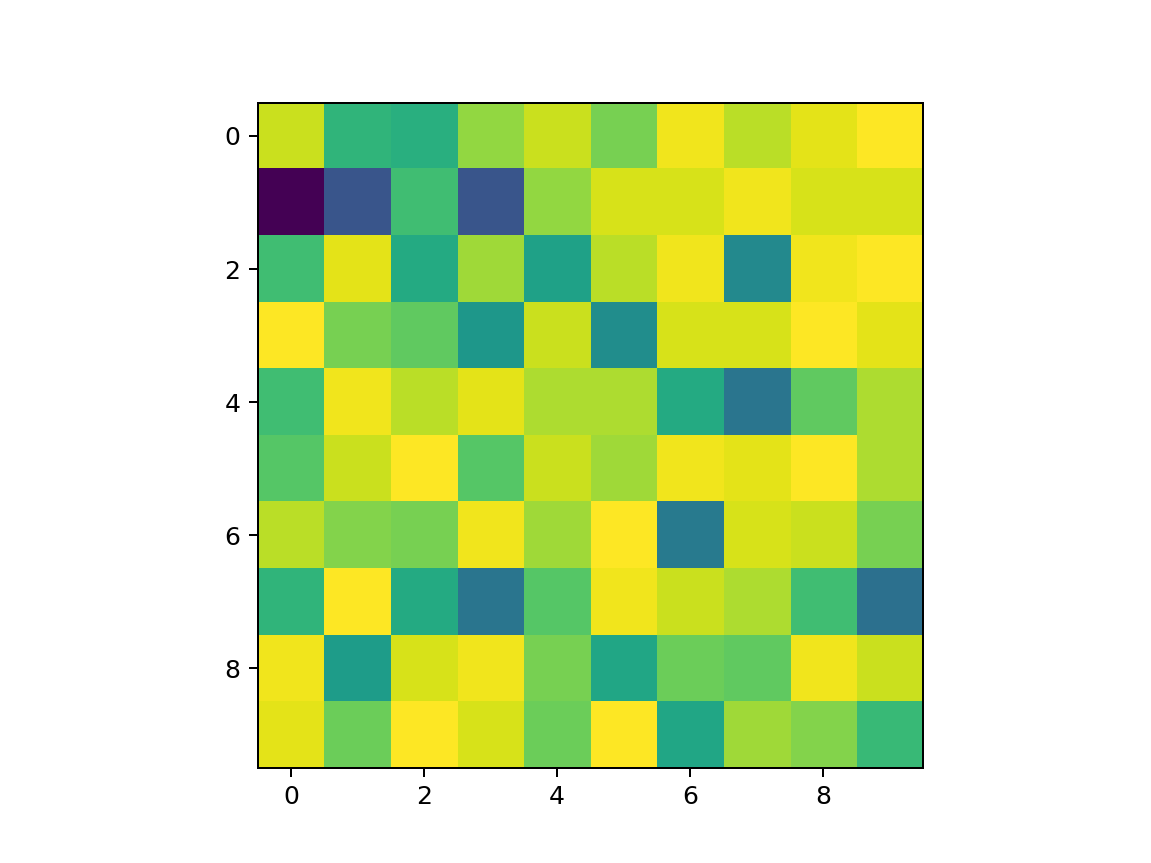

In [64]:
import tifffile
%matplotlib notebook
%pylab
plt.imshow(im.max(-3))#,plt.imshow(im2)

In [58]:
im2.shape

(5, 5, 2, 5)

<IPython.core.display.Javascript object>


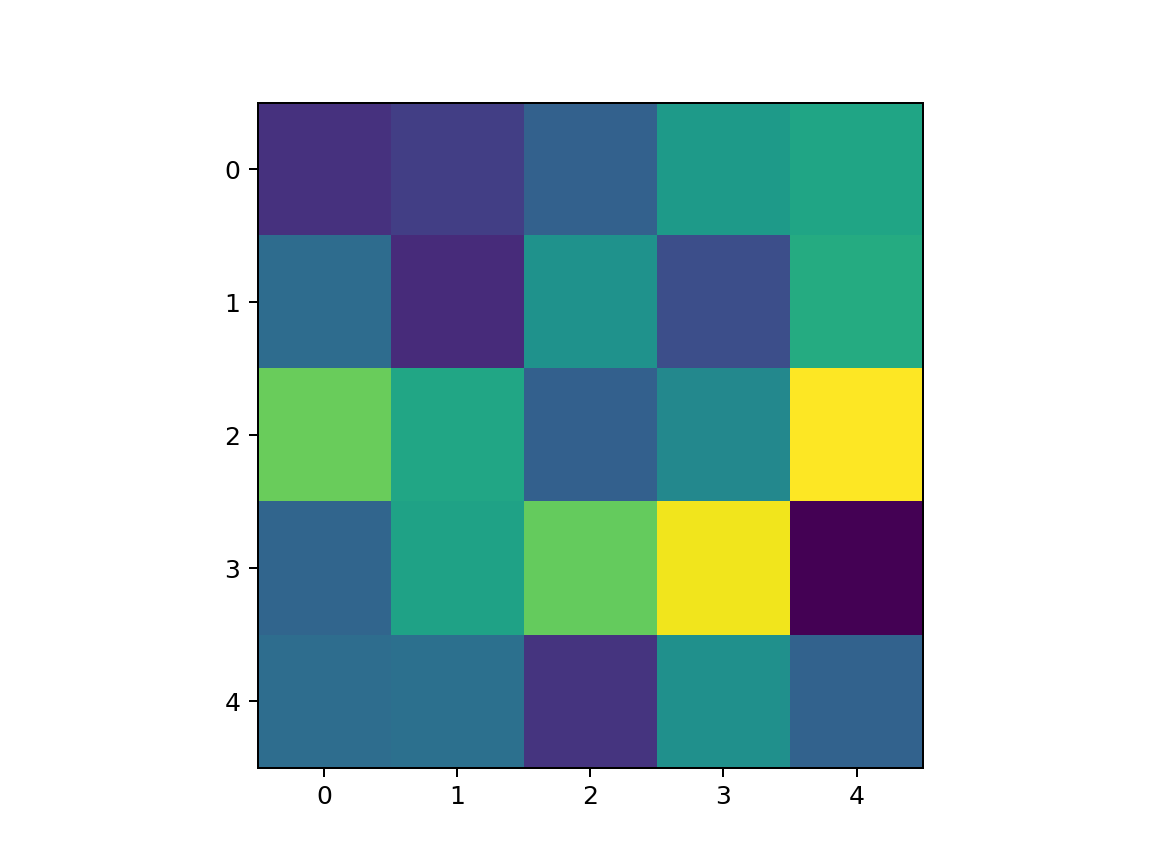

In [65]:
plt.figure()
plt.imshow(im2.max(-3))

In [10]:
da.overlap.trim_internal?

In [14]:
from scipy import ndimage
imr = np.random.randint(0,100,(100,100,100)).astype(np.float32)
im0 = np.zeros((100,100,100)).astype(np.float32)
%timeit ndimage.maximum_filter(imr,3)
%timeit ndimage.maximum_filter(im0,3)

23.3 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
14 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
